In [1]:
# Plot the output of ddcurves

In [1]:
import h5py
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
#from mpl_toolkits.axisartist.
from matplotlib.collections import LineCollection

from glob import glob

/home/suntans/.conda/envs/soda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
#%matplotlib inline

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.labelsize':'large'})

In [3]:
###########
# Inputs
datadir = '/home/suntans/cloudstor/Data/IMOS/'
sitename = 'KP150_12mth'
nparams=6


In [4]:
h5files = glob('%s/*_%s_*_%dparams_*.h5'%(datadir, sitename, nparams))
h5files

['/home/suntans/cloudstor/Data/IMOS/Crux_KP150_12mth_Density_lowpass_density_bhm_6params_2018-12-13.h5',
 '/home/suntans/cloudstor/Data/IMOS/Crux_KP150_12mth_Density_lowpass_density_bhm_6params_2018-12-16.h5']

In [5]:
ncfiles = glob('%s/*_%s_*_%dparams_*.nc'%(datadir, sitename, nparams))
ncfiles

['/home/suntans/cloudstor/Data/IMOS/Crux_KP150_12mth_Density_lowpass_density_bhm_6params_nliw.nc']

In [6]:
# List the netcdf files
ds = xr.open_mfdataset(ncfiles)
ds

<xarray.Dataset>
Dimensions:   (ensemble: 500, params: 6, time: 1480)
Coordinates:
  * time      (time) datetime64[ns] 2016-04-29T23:15:00 ... 2017-05-06T12:40:00
  * ensemble  (ensemble) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * params    (params) int64 0 1 2 3 4 5
Data variables:
    cn        (time, ensemble) float64 dask.array<shape=(1480, 500), chunksize=(1480, 500)>
    alpha     (time, ensemble) float64 dask.array<shape=(1480, 500), chunksize=(1480, 500)>
    beta      (params, time, ensemble) float64 dask.array<shape=(6, 1480, 500), chunksize=(6, 1480, 500)>

# To plot:

 - Isotherm heights
 - beta's w/ credible intervals
 - cn, alpha, Ls

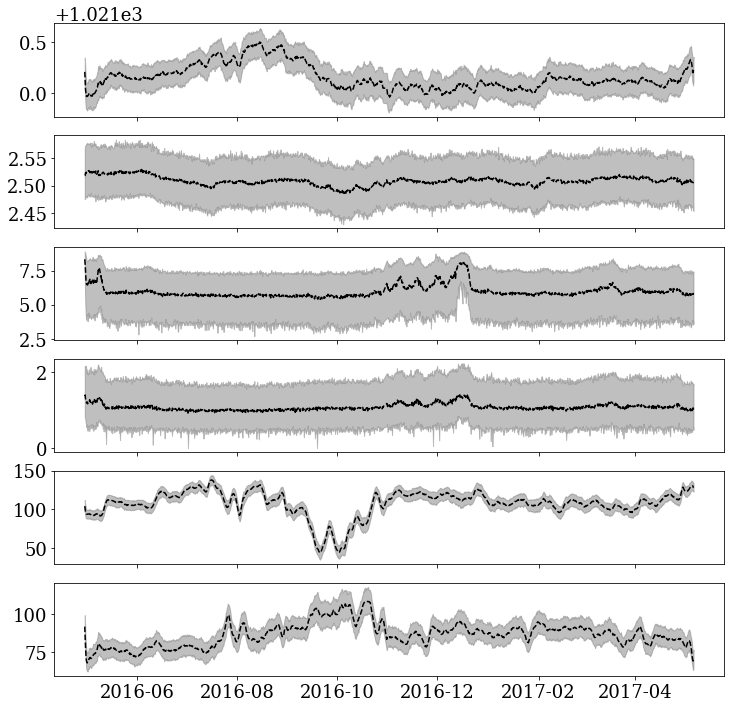

In [7]:
# Beta plot
plt.figure(figsize=(12,12))
for ii in range(nparams):
    
    b50 = np.median(ds.beta[ii,...], axis=-1)
    b5 = np.percentile(ds.beta[ii,...],5.,axis=-1)
    b95 = np.percentile(ds.beta[ii,...],95.,axis=-1)

    
    ax = plt.subplot(nparams,1,ii+1)
    plt.fill_between(ds.time.values, b5, y2=b95, color='0.5',alpha=0.5)
    plt.plot(ds.time, b50, 'k--')

    if ii < nparams-1:
        ax.set_xticklabels([])
    

In [45]:
def double_tanh_6(beta, z):
    
    return beta[0,...] - beta[1,...]*(np.tanh((z+beta[2,...])/beta[3,...])
                + np.tanh((z+beta2[2,...] + beta[4,...])/beta[5,...]))